Dataset Shape: (102599, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                

/tmp/ipython-input-2818706139.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="room type", palette="viridis")


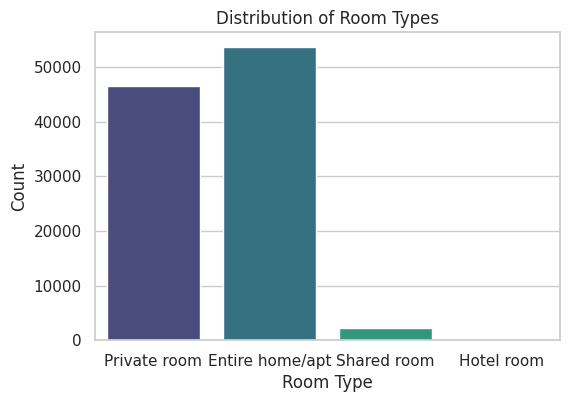

/tmp/ipython-input-2818706139.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="neighbourhood group", y="price", estimator=np.mean, palette="mako")


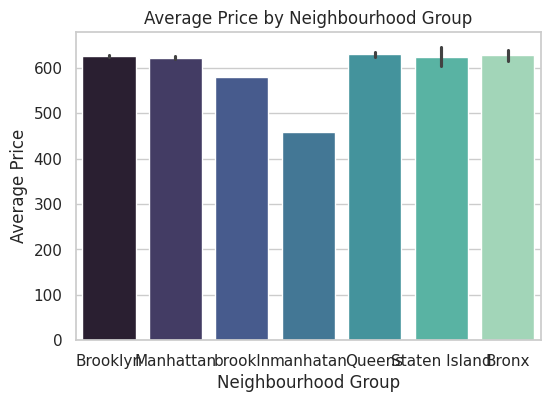

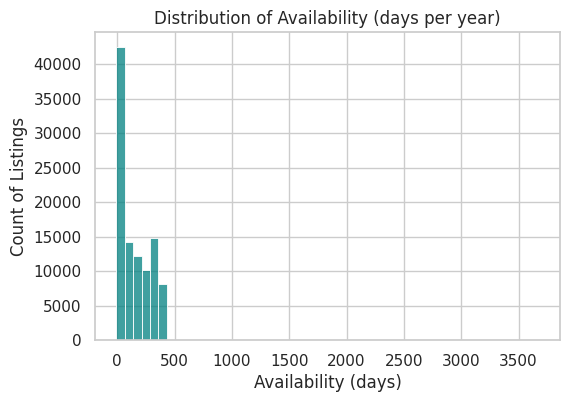

/tmp/ipython-input-2818706139.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neigh.values, y=top_neigh.index, palette="cubehelix")


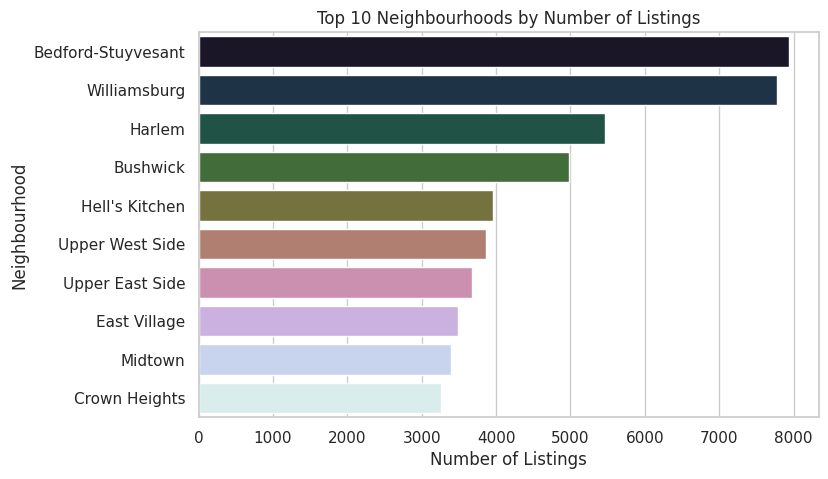

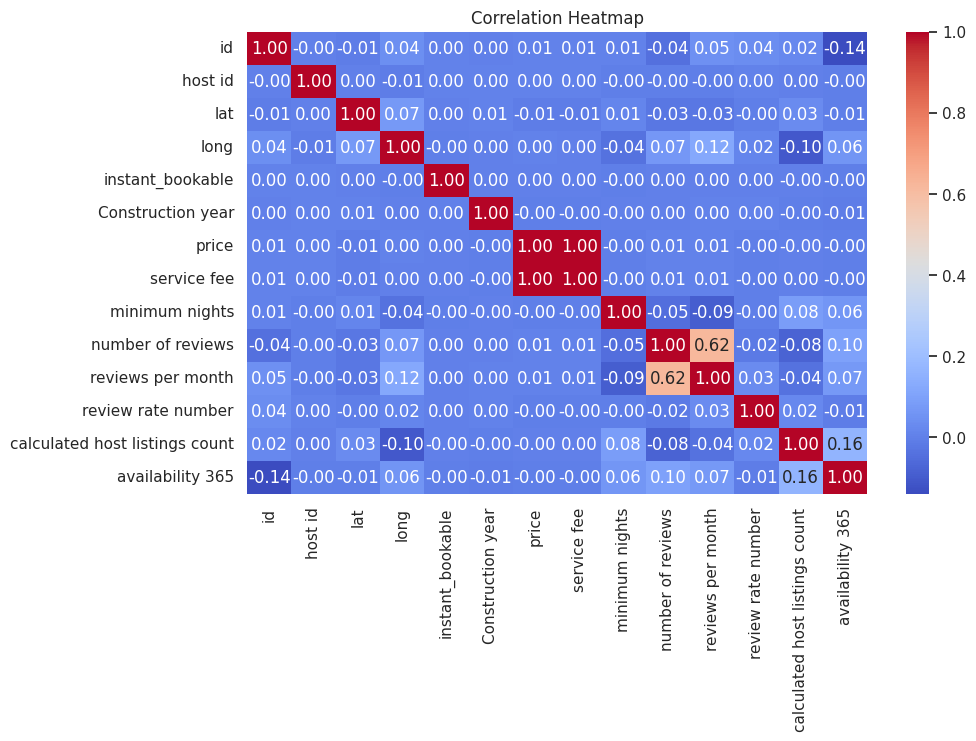

🔍 Key Insights:
1. Entire home/apt and Private room are the most common room types.
2. Prices vary significantly across neighbourhood groups.
3. Availability shows peaks at 0 and 365 days, meaning many hosts either don't open their listings or keep them available year-round.
4. Certain neighbourhoods dominate the listings (top 10 shown).
5. Correlations: Price is moderately related to service fee, and reviews per month are linked with number of reviews.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set(style="whitegrid")

# --- Load Dataset ---
# Make sure the file "Airbnb_Open_Data.xlsx" is in the same folder
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx", sheet_name="in")

# Display first few rows
print("Dataset Shape:", df.shape)
df.head()

# --- Data Cleaning ---
# Fill missing values
df['reviews per month'] = df['reviews per month'].fillna(0)
df['last review'] = df['last review'].fillna(pd.to_datetime("2000-01-01"))
df['price'] = df['price'].fillna(df['price'].median())

# Drop columns with too many missing values
if "license" in df.columns:
    df = df.drop(columns=["license"])

# Show dataset info
df.info()

# --- Basic Statistics ---
print("\nSummary Statistics:")
print(df.describe(include="all"))

# --------------------------------------------------
# Exploratory Data Analysis (EDA)
# --------------------------------------------------

# 1. Distribution of Room Types
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="room type", palette="viridis")
plt.title("Distribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

# 2. Average Price by Neighbourhood Group
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="neighbourhood group", y="price", estimator=np.mean, palette="mako")
plt.title("Average Price by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.show()

# 3. Availability Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['availability 365'].dropna(), bins=50, kde=False, color="teal")
plt.title("Distribution of Availability (days per year)")
plt.xlabel("Availability (days)")
plt.ylabel("Count of Listings")
plt.show()

# 4. Top 10 Neighbourhoods by Number of Listings
top_neigh = df['neighbourhood'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_neigh.values, y=top_neigh.index, palette="cubehelix")
plt.title("Top 10 Neighbourhoods by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighbourhood")
plt.show()

# 5. Correlation Heatmap for Numeric Columns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# --------------------------------------------------
# Insights Section (Markdown / Print)
# --------------------------------------------------
print("🔍 Key Insights:")
print("1. Entire home/apt and Private room are the most common room types.")
print("2. Prices vary significantly across neighbourhood groups.")
print("3. Availability shows peaks at 0 and 365 days, meaning many hosts either don't open their listings or keep them available year-round.")
print("4. Certain neighbourhoods dominate the listings (top 10 shown).")
print("5. Correlations: Price is moderately related to service fee, and reviews per month are linked with number of reviews.")
